In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
import os
import cv2

warnings.filterwarnings("ignore")  # 消除警告


def show_plt(y_pred, y_true, model=None):
    # 创建混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # 打印分类报告
    print(classification_report(y_true, y_pred))

    if model != None:
        # 使用条形图来展示每个类别的准确率
        accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
        plt.bar(range(len(model.classes)), accuracies)
        plt.xlabel("Class")
        plt.ylabel("Accuracy")
        plt.xticks(ticks=np.arange(len(model.classes)), labels=model.classes)
        plt.title("Per-Class Accuracy")
        plt.show()

In [2]:
X, Y = [], []
for i in range(0, 10):
    # 遍历文件夹，读取图片
    for f in os.listdir(f"./Sort_1000pics-main/Sort_1000pics-main/image_data/{i}"):
        # 打开一张图片并灰度化
        Images = cv2.imread(
            f"./Sort_1000pics-main/Sort_1000pics-main/image_data/{i}/{f}"
        )
        image = cv2.resize(Images, (256, 256), interpolation=cv2.INTER_CUBIC)
        hist = cv2.calcHist([image], [0, 1], None, [256, 256], [0.0, 255.0, 0.0, 255.0])
        X.append(((hist / 255).flatten()))
        Y.append(i)
X = np.array(X)
Y = np.array(Y)
# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

0.09666666666666666


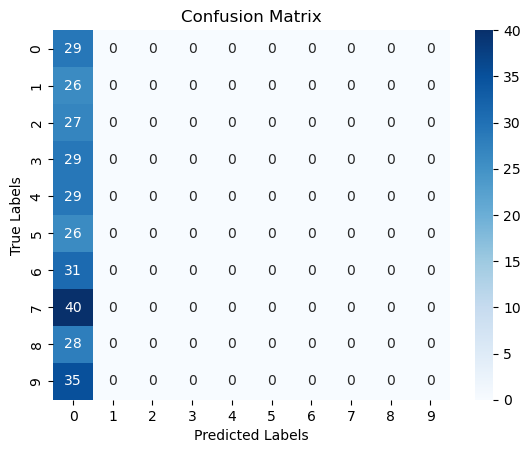

              precision    recall  f1-score   support

           0       0.10      1.00      0.18        29
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        35

    accuracy                           0.10       300
   macro avg       0.01      0.10      0.02       300
weighted avg       0.01      0.10      0.02       300

0.6633333333333333


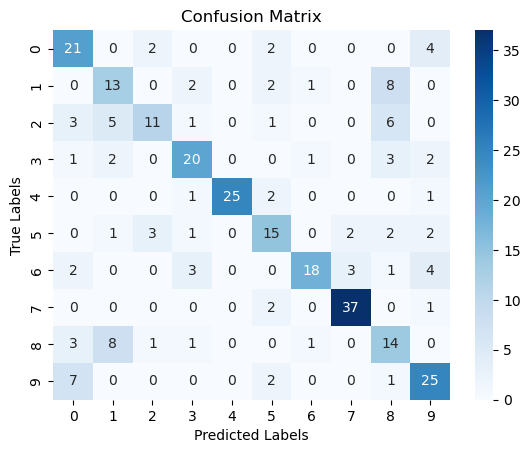

              precision    recall  f1-score   support

           0       0.57      0.72      0.64        29
           1       0.45      0.50      0.47        26
           2       0.65      0.41      0.50        27
           3       0.69      0.69      0.69        29
           4       1.00      0.86      0.93        29
           5       0.58      0.58      0.58        26
           6       0.86      0.58      0.69        31
           7       0.88      0.93      0.90        40
           8       0.40      0.50      0.44        28
           9       0.64      0.71      0.68        35

    accuracy                           0.66       300
   macro avg       0.67      0.65      0.65       300
weighted avg       0.68      0.66      0.67       300



In [3]:
from Bayes import GaussianNaiveBayes, MultinomialNaiveBayes

my_gnb = GaussianNaiveBayes()
my_gnb.fit(X_train, y_train)
y_pred = my_gnb.predict(X_test, y_test)
show_plt(y_pred, y_test)

sk_gnb = GaussianNB()
sk_gnb.fit(X_train, y_train)
y_pred = sk_gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
show_plt(y_pred, y_test)

0.71


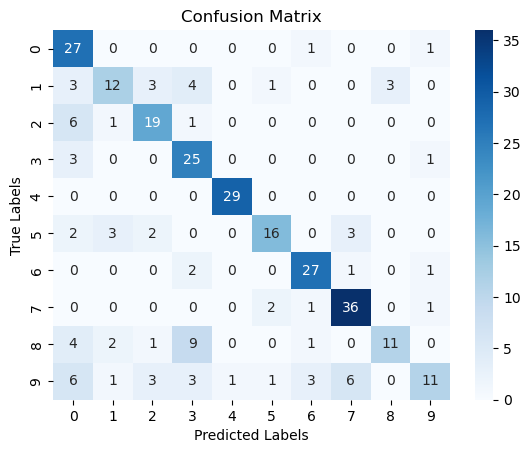

              precision    recall  f1-score   support

           0       0.53      0.93      0.67        29
           1       0.63      0.46      0.53        26
           2       0.68      0.70      0.69        27
           3       0.57      0.86      0.68        29
           4       0.97      1.00      0.98        29
           5       0.80      0.62      0.70        26
           6       0.82      0.87      0.84        31
           7       0.78      0.90      0.84        40
           8       0.79      0.39      0.52        28
           9       0.73      0.31      0.44        35

    accuracy                           0.71       300
   macro avg       0.73      0.71      0.69       300
weighted avg       0.73      0.71      0.69       300

0.71


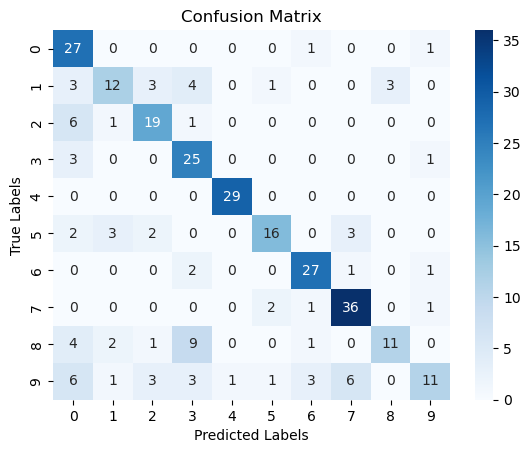

              precision    recall  f1-score   support

           0       0.53      0.93      0.67        29
           1       0.63      0.46      0.53        26
           2       0.68      0.70      0.69        27
           3       0.57      0.86      0.68        29
           4       0.97      1.00      0.98        29
           5       0.80      0.62      0.70        26
           6       0.82      0.87      0.84        31
           7       0.78      0.90      0.84        40
           8       0.79      0.39      0.52        28
           9       0.73      0.31      0.44        35

    accuracy                           0.71       300
   macro avg       0.73      0.71      0.69       300
weighted avg       0.73      0.71      0.69       300



In [4]:
my_mnb = MultinomialNaiveBayes()
my_mnb.fit(X_train, y_train)
y_pred = my_mnb.predict(X_test, y_test)
show_plt(y_pred, y_test)

sk_mnb = MultinomialNB()
sk_mnb.fit(X_train, y_train)
y_pred = sk_mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
show_plt(y_pred, y_test)

In [ ]:
print("---sklearn库SVM---")
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
show_plt(y_pred, y_test)

---sklearn库SVM---


In [ ]:
print("---sklearn库决策树---")
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
show_plt(y_pred, y_test)

In [ ]:
print("---sklearn库随机森林---")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
show_plt(y_pred, y_test)

In [ ]:
print("---sklearn库梯度提升决策树 (GBDT)---")
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
y_pred = gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
show_plt(y_pred, y_test)

In [ ]:
import lightgbm as lgb

print("---lightgbm---")
params = {
    "boosting_type": "gbdt",
    "objective": "multiclass",  # 多分类问题
    "metric": "multi_logloss",  # 多分类问题
    "num_class": 10,  # 类别数量
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0,
}
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
clf = lgb.train(
    params,
    train_data,
    num_boost_round=20,
    valid_sets=[train_data, test_data],
    valid_names=["train", "eval"],
)
# 用模型进行预测，得到的是每个类别的概率
y_pred_proba = clf.predict(X_test, num_iteration=clf.best_iteration)

# 从概率矩阵中提取预测的类别
y_pred = np.argmax(y_pred_proba, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
show_plt(y_pred, y_test)